In [1]:
!pip install pyspark seaborn matplotlib pandas


In [2]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
spark = SparkSession.builder.appName("SocialMediaAddictionAnalysis").getOrCreate()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Students Social Media Addiction.csv to Students Social Media Addiction.csv


In [5]:
df = spark.read.csv("Students Social Media Addiction.csv", header=True, inferSchema=True)

In [6]:
df.printSchema()
df.show(5)

root
 |-- Student_ID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Academic_Level: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Avg_Daily_Usage_Hours: double (nullable = true)
 |-- Most_Used_Platform: string (nullable = true)
 |-- Affects_Academic_Performance: string (nullable = true)
 |-- Sleep_Hours_Per_Night: double (nullable = true)
 |-- Mental_Health_Score: integer (nullable = true)
 |-- Relationship_Status: string (nullable = true)
 |-- Conflicts_Over_Social_Media: integer (nullable = true)
 |-- Addicted_Score: integer (nullable = true)

+----------+---+------+--------------+----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|Student_ID|Age|Gender|Academic_Level|   Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|

In [7]:
df = df.dropDuplicates().na.drop()

In [8]:
print("Total records:", df.count())

Total records: 705


In [9]:
print("Columns:", df.columns)

Columns: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']


In [10]:
df.describe().show()

+-------+-----------------+------------------+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+------------------+
|summary|       Student_ID|               Age|Gender|Academic_Level|    Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|    Addicted_Score|
+-------+-----------------+------------------+------+--------------+-----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+------------------+
|  count|              705|               705|   705|           705|        705|                  705|               705|                         705|                  705|                705|                705|        

In [11]:
if "Gender" in df.columns:
    df.select("Gender").distinct().show()

if "Platform" in df.columns:
    df.select("Platform").distinct().show()

+------+
|Gender|
+------+
|Female|
|  Male|
+------+



In [12]:
if "Average Screen Time (hours)" in df.columns:
    avg_screen = df.groupBy("Gender").avg("Average Screen Time (hours)")
    avg_screen.show()

In [13]:
pdf = df.toPandas()
sns.set(style="whitegrid")

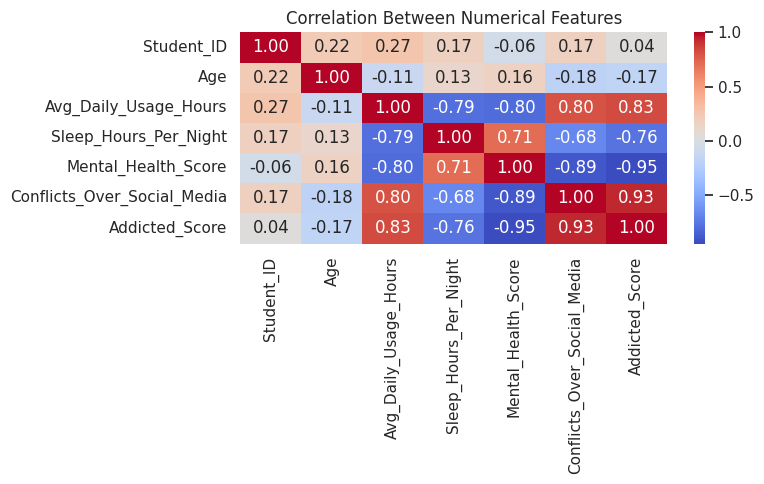

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(pdf.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()

In [23]:
pdf.columns = pdf.columns.str.strip()

In [26]:
print("📋 Columns in your dataset:")
for col in pdf.columns:
    print(f"- {col}")

📋 Columns in your dataset:
- Student_ID
- Age
- Gender
- Academic_Level
- Country
- Avg_Daily_Usage_Hours
- Most_Used_Platform
- Affects_Academic_Performance
- Sleep_Hours_Per_Night
- Mental_Health_Score
- Relationship_Status
- Conflicts_Over_Social_Media
- Addicted_Score


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
sns.set(style="whitegrid")


/tmp/ipython-input-1659960898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


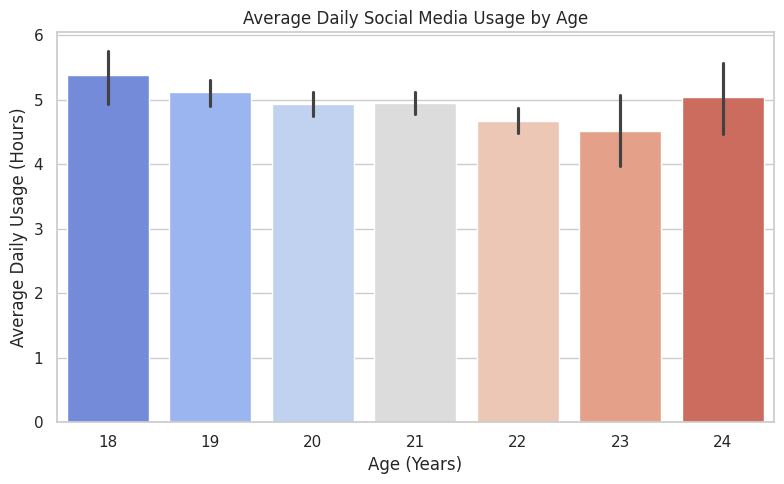

In [29]:
# 1️⃣ Average Screen Time by Age
plt.figure(figsize=(8,5))
sns.barplot(
    x="Age",
    y="Avg_Daily_Usage_Hours",
    data=pdf,
    palette="coolwarm",
    estimator="mean"
)
plt.title("Average Daily Social Media Usage by Age")
plt.xlabel("Age (Years)")
plt.ylabel("Average Daily Usage (Hours)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4025187543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


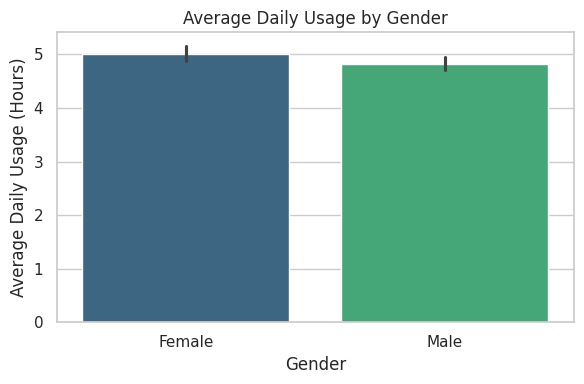

In [30]:
# 2️⃣ Average Screen Time by Gender
plt.figure(figsize=(6,4))
sns.barplot(
    x="Gender",
    y="Avg_Daily_Usage_Hours",
    data=pdf,
    palette="viridis",
    estimator="mean"
)
plt.title("Average Daily Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Daily Usage (Hours)")
plt.tight_layout()
plt.show()

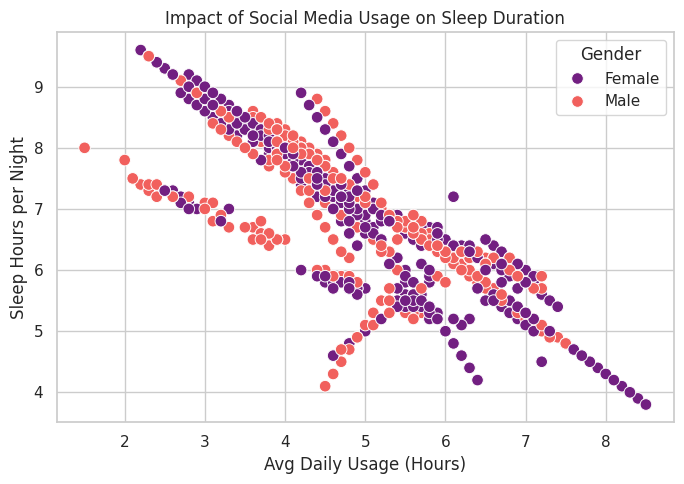

In [31]:
# 3️⃣ Relationship Between Screen Time and Sleep Duration
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Avg_Daily_Usage_Hours",
    y="Sleep_Hours_Per_Night",
    hue="Gender",
    data=pdf,
    palette="magma",
    s=70
)
plt.title("Impact of Social Media Usage on Sleep Duration")
plt.xlabel("Avg Daily Usage (Hours)")
plt.ylabel("Sleep Hours per Night")
plt.tight_layout()
plt.show()
